In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plb
%matplotlib inline 

In [3]:
df = pd.read_csv('FuelData.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2016,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.3,6.6,8.1,35,189
1,2016,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6,AS9,Z,12.7,9.1,11.1,25,254
2,2016,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6,AS9,Z,12.2,9.1,10.7,26,251
3,2016,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.4,8.6,10.7,26,249
4,2016,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,235


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,9.3,6.6,8.1,189
1,3.5,6,12.7,9.1,11.1,254
2,3.5,6,12.2,9.1,10.7,251
3,3.5,6,12.4,8.6,10.7,249
4,3.5,6,11.9,7.7,10.0,235
5,3.5,6,8.0,7.5,7.7,180
6,2.4,4,9.6,6.6,8.3,196
7,3.5,6,11.2,7.5,9.6,226
8,1.8,4,9.7,6.9,8.4,197


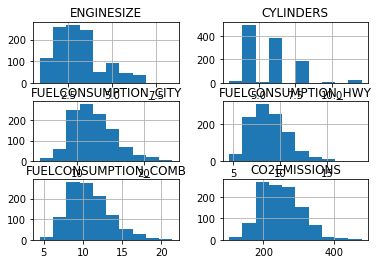

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.hist()
plt.show()

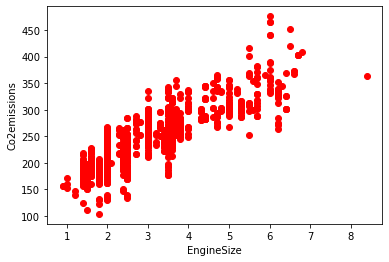

In [6]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color='red')
plt.xlabel('EngineSize')
plt.ylabel('Co2emissions')
plt.show()

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# multiple regression

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print('Coefficient: ',regr.coef_)
print('Intercept: ',regr.intercept_)

Coefficient:  [[ 5.34595645  6.66528245 13.58793258]]
Intercept:  [47.690298]


In [9]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predictions = regr.predict(test_x)

#residual sum of squared errors
print('MSE: %.2f' %np.mean((predictions - test_y) ** 2))
#Absolute mean error
print('MAE: %.2f'%np.absolute(np.mean(predictions - test_y)))
#closeness
print('r2_score: %.2f'%r2_score(test_y,predictions))
#Variance score
print('Variance: %.2f'%regr.score(test_x,test_y))

MSE: 323.72
MAE: 0.25
r2_score: 0.88
Variance: 0.88


In [10]:
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
print('Coefficient: ',regr.coef_)

Coefficient:  [[5.36889938 6.9779629  6.45966039 7.52452146]]


In [11]:
t_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
t_y = np.asanyarray(test[['CO2EMISSIONS']])
preds = regr.predict(t_x)

print('MSE: %.2f'%np.mean((preds - t_y)**2))
print('Variance score: %.2f'%regr.score(t_x,t_y))

MSE: 321.81
Variance score: 0.88
